<a href="https://colab.research.google.com/github/Pavansai03/machine-learning/blob/main/perceptron_trick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abirhasan1703100/single-layer-perceptron-datasetsmall")

print("Path to dataset files:", path)

100%|██████████| 349/349 [00:00<00:00, 836kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/abirhasan1703100/single-layer-perceptron-datasetsmall/versions/1


In [40]:
df = pd.read_csv("/content/Single Layer Perceptron Dataset.csv")
df
df.dropna(inplace=True)
df

,Pattern,Feature1,Feature2,Feature3,Class_Label
0,1.0,1.0,0.08,0.72,1.0
1,2.0,1.0,0.10,1.00,1.0
2,3.0,1.0,0.26,0.58,1.0
3,4.0,1.0,0.35,0.95,0.0
4,5.0,1.0,0.45,0.15,1.0
5,6.0,1.0,0.60,0.30,1.0
6,7.0,1.0,0.70,0.65,0.0
7,8.0,1.0,0.92,0.45,0.0
8,9.0,1.0,0.42,0.85,0.0
9,10.0,1.0,0.65,0.55,0.0


<Axes: xlabel='Feature2', ylabel='Feature3'>

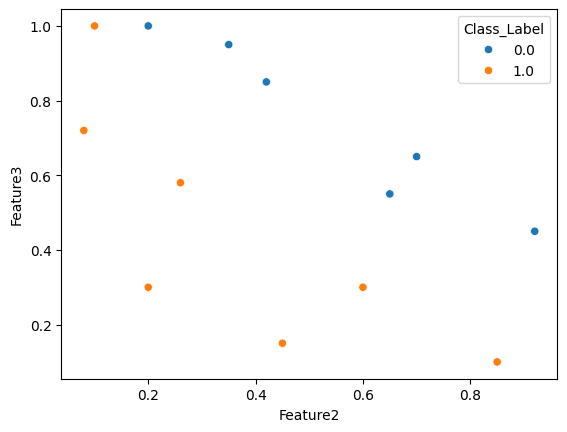

In [49]:
sns.scatterplot(x = df['Feature2'],y = df['Feature3'],hue = df['Class_Label'])
# sns.scatterplot(x = df['Pattern'],y = df['Feature2'],hue = df['Class_Label'])
# sns.scatterplot(x = df['Pattern'],y = df['Feature3'],hue = df['Class_Label'])

In [85]:
x = df.iloc[:, 2:4]
y = df.iloc[:, -1]
y = np.array(y, dtype = np.int8)
x = np.insert(x,0,1,axis = 1)
x

array([[1.  , 0.08, 0.72],
       [1.  , 0.1 , 1.  ],
       [1.  , 0.26, 0.58],
       [1.  , 0.35, 0.95],
       [1.  , 0.45, 0.15],
       [1.  , 0.6 , 0.3 ],
       [1.  , 0.7 , 0.65],
       [1.  , 0.92, 0.45],
       [1.  , 0.42, 0.85],
       [1.  , 0.65, 0.55],
       [1.  , 0.2 , 0.3 ],
       [1.  , 0.2 , 1.  ],
       [1.  , 0.85, 0.1 ]])

In [96]:
lr = 0.1
epchos = 1000
b = np.ones(x.shape[1])

for i in range(epchos):
  j = np.random.randint(0,12)
  y_curr = np.dot(x[j],b)
  if y_curr > 0:
     y_curr = 1
  else:
     y_curr = 0
  b = b+lr*(y[j]-y_curr)*x[j]

intercept = b[0]
coef = b[1:]
coef


array([-0.278, -0.267])

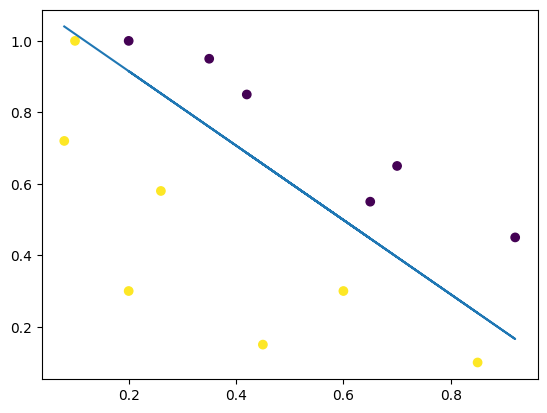

In [98]:
plt.scatter(df['Feature2'],df['Feature3'],c=df['Class_Label'])
plt.plot(df['Feature2'],-1*(intercept+coef[0]*df['Feature2'])/coef[1])
